In [1]:
setwd("C:/Users/Zoe/Desktop/Disertatie/Coduri")

In [3]:
library(readxl)
library(MASS)
library(base)
library(vars)
library(car)
library(forecast)
library(tseries)

In [4]:
Disertatie <- read_excel("DisertatieM1.xlsx")

In [5]:
train_data <- Disertatie[1:(nrow(Disertatie)-7), ]
test_data <- Disertatie[(nrow(Disertatie)-6):(nrow(Disertatie)), ]

In [6]:
test_data

Data,RI,RPM,R_CRED,R_DEP,EUR,SN,RSBIM_15_74,M1
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-10-01,15.32,6.25,7.25,5.25,4.9266,4008,5.7,398146000
2022-11-01,16.76,6.75,7.75,5.75,4.9131,4141,5.7,389976296
2022-12-01,16.37,6.75,7.75,5.75,4.9224,4398,5.6,398407606
2023-01-01,15.07,7.00,8.00,6.00,4.9227,4254,5.6,390090363
2023-02-01,15.52,7.00,8.00,6.00,4.9077,4270,5.5,389759403
2023-03-01,14.53,7.00,8.00,6.00,4.9263,4554,5.4,382193287
2023-04-01,11.23,7.00,8.00,6.00,4.9364,4554,5.4,381901459


In [7]:
model1 <- lm(RI ~ ., data = train_data[-1])
model1


Call:
lm(formula = RI ~ ., data = train_data[-1])

Coefficients:
(Intercept)          RPM       R_CRED        R_DEP          EUR           SN  
 -1.840e+01    1.434e+00    3.819e-01   -6.260e-01    1.425e+00    2.425e-03  
RSBIM_15_74           M1  
  6.400e-02    1.680e-08  


In [8]:
summary(model1)


Call:
lm(formula = RI ~ ., data = train_data[-1])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6238 -1.4061 -0.3029  1.2262  5.0026 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.840e+01  3.665e+00  -5.020 1.23e-06 ***
RPM          1.434e+00  4.598e-01   3.119  0.00211 ** 
R_CRED       3.819e-01  2.771e-01   1.378  0.16994    
R_DEP       -6.260e-01  2.519e-01  -2.485  0.01385 *  
EUR          1.425e+00  1.179e+00   1.208  0.22852    
SN           2.425e-03  1.401e-03   1.731  0.08518 .  
RSBIM_15_74  6.400e-02  2.002e-01   0.320  0.74958    
M1           1.680e-08  8.531e-09   1.969  0.05049 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.816 on 181 degrees of freedom
Multiple R-squared:  0.7355,	Adjusted R-squared:  0.7253 
F-statistic: 71.91 on 7 and 181 DF,  p-value: < 2.2e-16


In [9]:
vif(model1)

RPM      R_CRED       R_DEP         EUR          SN RSBIM_15_74 
  89.595035   74.842030    8.711458   13.872705   81.844572    5.541313 
         M1 
  45.157695


	Breusch-Godfrey test for serial correlation of order up to 11

data:  Residuals
LM test = 156.41, df = 11, p-value < 2.2e-16


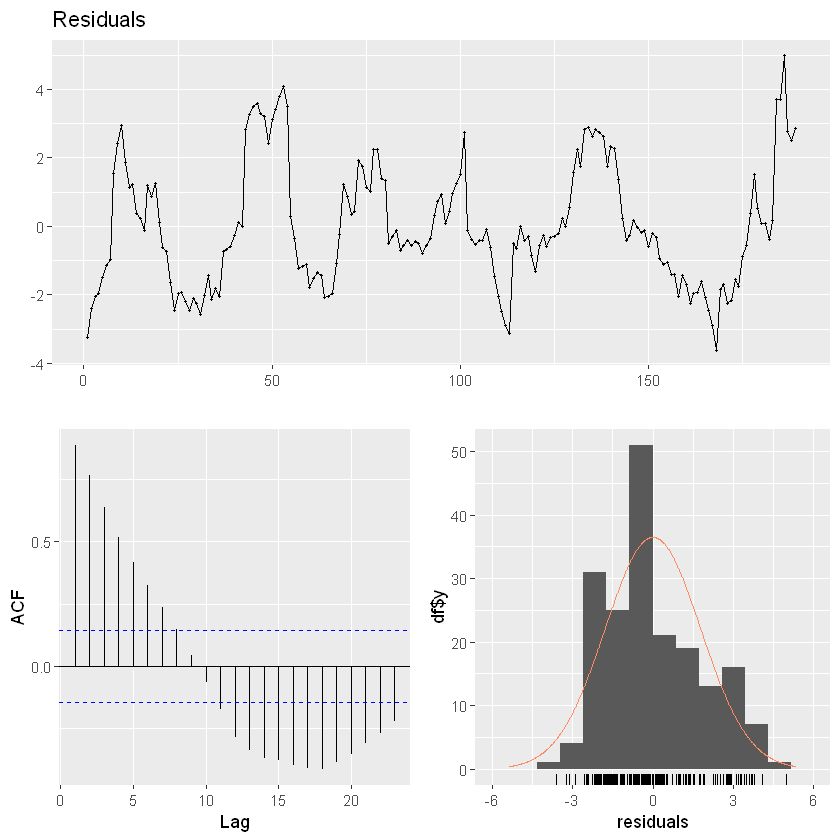

In [10]:
checkresiduals(model1)

In [11]:
residual = residuals(model1)
jarque.bera.test(residual)


	Jarque Bera Test

data:  residual
X-squared = 9.6341, df = 2, p-value = 0.008091


In [12]:
white.test(residual)


ERROR: Error in as.matrix(y): argument "y" is missing, with no default


In [13]:
white_test <- bptest(model1)
white_test


	studentized Breusch-Pagan test

data:  model1
BP = 23.528, df = 7, p-value = 0.001379


In [14]:
Box.test(residual, lag = 4, type = "Ljung-Box")


	Box-Ljung test

data:  residual
X-squared = 395.35, df = 4, p-value < 2.2e-16


In [15]:
model2 <- lm(RI ~ ., data = Disertatie[,-c(1,3,4,7,8)])
model2


Call:
lm(formula = RI ~ ., data = Disertatie[, -c(1, 3, 4, 7, 8)])

Coefficients:
(Intercept)        R_DEP          EUR           M1  
  8.631e+00    1.503e+00   -2.369e+00    2.007e-08  


In [16]:
summary(model2)


Call:
lm(formula = RI ~ ., data = Disertatie[, -c(1, 3, 4, 7, 8)])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9844 -1.8812 -0.0674  1.2978  6.7363 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.631e+00  2.689e+00   3.209 0.001559 ** 
R_DEP        1.503e+00  1.061e-01  14.164  < 2e-16 ***
EUR         -2.369e+00  6.638e-01  -3.568 0.000454 ***
M1           2.007e-08  2.470e-09   8.125 5.36e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.377 on 192 degrees of freedom
Multiple R-squared:  0.6479,	Adjusted R-squared:  0.6424 
F-statistic: 117.8 on 3 and 192 DF,  p-value: < 2.2e-16


In [17]:
model_summary <- summary(model2)
coefficients <- model_summary$coefficients
coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),8.630900e+00,2.689296e+00,3.209353,1.559301e-03
R_DEP,1.503087e+00,1.061232e-01,14.163606,1.203040e-31
EUR,-2.368712e+00,6.638499e-01,-3.568144,4.540714e-04
M1,2.007085e-08,2.470377e-09,8.124613,5.362546e-14



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 170.66, df = 10, p-value < 2.2e-16


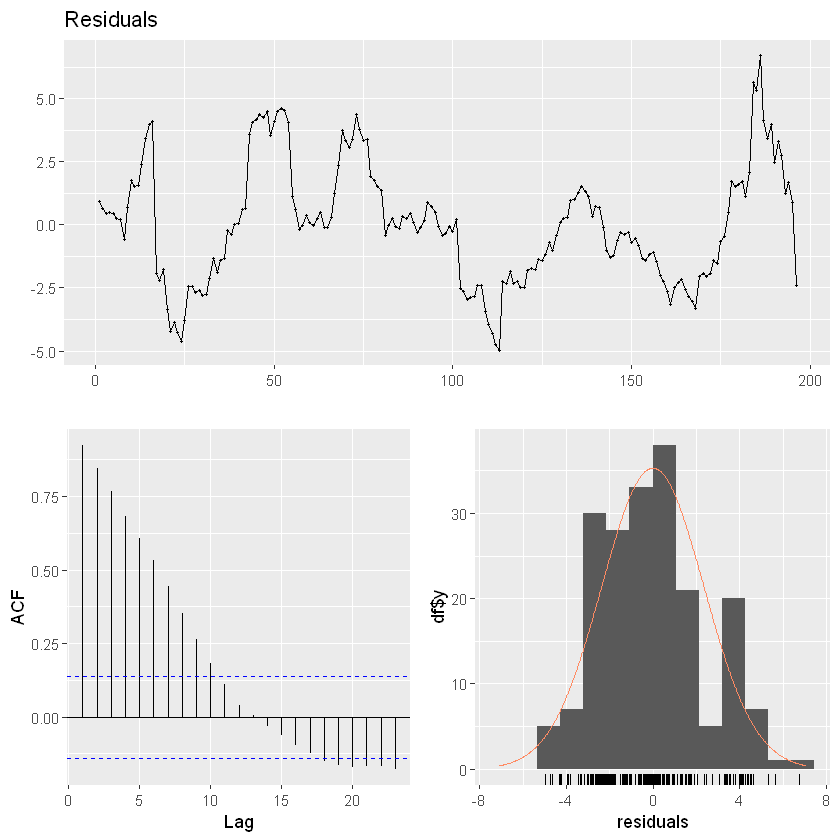

In [24]:
checkresiduals(model2)

In [25]:
residual = residuals(model2)
jarque.bera.test(residual)


	Jarque Bera Test

data:  residual
X-squared = 5.3216, df = 2, p-value = 0.06989


In [26]:
white_test <- bptest(model1)
white_test


	studentized Breusch-Pagan test

data:  model1
BP = 23.528, df = 7, p-value = 0.001379


In [27]:
Box.test(residual, lag = 4, type = "Ljung-Box")


	Box-Ljung test

data:  residual
X-squared = 525.82, df = 4, p-value < 2.2e-16


In [28]:
y_pred <- predict(model2,  newdata = test_data)

In [29]:
y_pred

1        2        3        4        5        6        7 
12.84354 13.46309 13.61028 13.81841 13.84730 13.65138 13.62160

In [30]:
test_data

Data,RI,RPM,R_CRED,R_DEP,EUR,SN,RSBIM_15_74,M1
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-10-01,15.32,6.25,7.25,5.25,4.9266,4008,5.7,398146000
2022-11-01,16.76,6.75,7.75,5.75,4.9131,4141,5.7,389976296
2022-12-01,16.37,6.75,7.75,5.75,4.9224,4398,5.6,398407606
2023-01-01,15.07,7.00,8.00,6.00,4.9227,4254,5.6,390090363
2023-02-01,15.52,7.00,8.00,6.00,4.9077,4270,5.5,389759403
2023-03-01,14.53,7.00,8.00,6.00,4.9263,4554,5.4,382193287
2023-04-01,11.23,7.00,8.00,6.00,4.9364,4554,5.4,381901459


In [31]:
log_likelihood <- logLik(model2)
log_likelihood

'log Lik.' -445.8048 (df=5)

In [32]:
aic <- AIC(model2)
bic <- BIC(model2)

aic
bic

[1] 901.6095

[1] 918.0001